In [87]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential

from mpl_toolkits.mplot3d import Axes3D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import InputLayer, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf

In [88]:
#Check data shape
#Should be (992641,29)
data=pd.read_csv('Data(withouthead).csv', header=None)
data=np.array(data)
data.shape

(992641, 29)

In [89]:
#Split data into X and Labels
Y=data[:10000,1]
X=data[:10000,2:]
print(X.shape)
print(Y.shape)

(10000, 27)
(10000,)


In [90]:
temp=[]
for i in np.arange(1,len(X[0]),3):
    
    temp.append(X[:,i])
    temp.append(X[:,i+1])
temp=np.array(temp)
X=temp.T

In [91]:
def normalize(X):
    # normalising the data feature wise 
    mean=np.mean(X, axis=0)
    stdev=np.std(X,axis=0)
    Normalised_X= (X-mean)/stdev
    return Normalised_X

In [92]:
# normalising data
norm_x = normalize(X)

In [93]:
featured_x = list(norm_x.T)
x1sum= (featured_x[3]**2)+(featured_x[11]**2)+(featured_x[15]**2)
x1sum2 = (featured_x[2]**2)+(featured_x[10]**2)+(featured_x[14]**2)
x1sum3 = (featured_x[0]**2)+(featured_x[8]**2)+(featured_x[16]**2)
x1sum4 = (featured_x[1]**2)+(featured_x[9]**2)+(featured_x[17]**2)
featured_x.append(x1sum)
featured_x.append(x1sum2)
featured_x.append(x1sum3)
featured_x.append(x1sum4)
featured_x = np.array(featured_x)
featured_x = featured_x.T

In [94]:
#Change labels to binary
#Do not run this cell multiple times as the value of Y due to line one changes 
#If check gives any zero values then re-run from start
Y[np.where(Y<=100.)]=0
Y[np.where(Y>100)]=1

In [95]:
from sklearn.model_selection import train_test_split
# use x1 , norm_x, featured_X for different results

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42,shuffle=True)

In [96]:
xmin=[]
xmax=[]
for i in range(18):
    xmin.append(X_train[:,i].min()-1)
    xmax.append(X_train[:,i].max()+1)
xmin=np.array(xmin)
xmax=np.array(xmax)
x_min, x_max = np.amin(xmin),np.amax(xmax)
y_min, y_max = 0,1
xx, yy = np.meshgrid(np.arange(x_min, x_max,1), np.arange(y_min, y_max,1))

# Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfclass=RandomForestClassifier()
rfclass.fit(X_train, Y_train)
Y_pred=rfclass.predict(X_test)

trainscore=rfclass.score(X_train,Y_train)
testscore=rfclass.score(X_test,Y_test)
acctest=rfclass.score(X_test,Y_test)
acctrain=rfclass.score(X_train,Y_train)
print(acctrain)
print(acctest)

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9956
0.9224


In [98]:
from sklearn.model_selection import cross_val_score
#knn = KNeighborsClassifier(n_neighbors=5)
rfclass=RandomForestClassifier()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(rfclass, X, Y, cv=10)

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [99]:
print(np.var(scores))

0.001483690157071406


# MLP with rms_prop

In [100]:
def create_network():
    model=Sequential()
    model.add(Dense(100, input_dim=18, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(40, activation='relu'))
    #model.add(Dense(30, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    #Y_train1= keras.utils.to_categorical(Y_train)
    return model
model = create_network()
historyrms=model.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
7500/7500 [==============================] - 4s 487us/step - loss: 0.4637 - accuracy: 0.7688
Epoch 2/50
7500/7500 [==============================] - 3s 391us/step - loss: 0.4365 - accuracy: 0.7783
Epoch 3/50
7500/7500 [==============================] - 3s 388us/step - loss: 0.4270 - accuracy: 0.7828
Epoch 4/50
7500/7500 [==============================] - 3s 392us/step - loss: 0.4289 - accuracy: 0.7869
Epoch 5/50
7500/7500 [==============================] - 3s 418us/step - loss: 0.4333 - accuracy: 0.7848
Epoch 6/50
7500/7500 [==============================] - 3s 424us/step - loss: 0.4255 - accuracy: 0.7881
Epoch 7/50
7500/7500 [==============================] - 3s 394us/step - loss: 0.4208 - accuracy: 0.7855
Epoch 8/50
7500/7500 [==============================] - 3s 407us/step - loss: 0.4242 - accuracy: 0.7844
Epoch 9/50
7500/7500 [==============================] - 3s 401us/step - loss: 0.4234 - accuracy: 0.7885
Epoch 10/50
7500/7500 [==============================] - 3s 402u

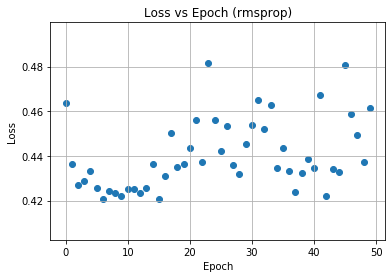

In [102]:
plot=np.arange(0,50,1)
lossplotrmsprop1=(historyrms.history['loss'])
plt.scatter(plot,lossplotrmsprop1)
plt.title('Loss vs Epoch (rmsprop)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
#plt.ylim((0.395,0.435))
plt.show()

In [105]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
scores = cross_val_score(neural_network,X, Y, cv=5)

In [106]:
print(scores.max())
print(scores.min())
print(np.var(scores))

0.7910000085830688
0.6919999718666077
0.0011964608898546202


In [107]:
accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy[1]*100))

7500/7500 [==============================] - 2s 216us/step
Accuracy: 79.52


In [108]:
print(model.summary())

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_478 (Dense)            (None, 100)               1900      
_________________________________________________________________
dense_479 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_480 (Dense)            (None, 60)                4860      
_________________________________________________________________
dense_481 (Dense)            (None, 40)                2440      
_________________________________________________________________
dense_482 (Dense)            (None, 2)                 82        
Total params: 17,362
Trainable params: 17,362
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

2500/2500 [==============================] - 0s 123us/step
Accuracy: 78.08


# MLP with SGD optimizer

In [112]:
def create_network2():
    model=Sequential()
    model.add(Dense(60, input_dim=18, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(70, activation='relu'))
    model.add(Dense(40, activation='relu'))
    #model.add(Dense(30, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    #Y_train1= keras.utils.to_categorical(Y_train)
    return model
model = create_network2()
historysgd=model.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
7500/7500 [==============================] - 5s 651us/step - loss: 0.5135 - accuracy: 0.7720
Epoch 2/50
7500/7500 [==============================] - 3s 457us/step - loss: 0.4419 - accuracy: 0.7768
Epoch 3/50
7500/7500 [==============================] - 3s 447us/step - loss: 0.4284 - accuracy: 0.7837
Epoch 4/50
7500/7500 [==============================] - 3s 432us/step - loss: 0.4243 - accuracy: 0.7844
Epoch 5/50
7500/7500 [==============================] - 4s 488us/step - loss: 0.4188 - accuracy: 0.7889
Epoch 6/50
7500/7500 [==============================] - 3s 451us/step - loss: 0.4185 - accuracy: 0.7868
Epoch 7/50
7500/7500 [==============================] - 4s 475us/step - loss: 0.4146 - accuracy: 0.7916
Epoch 8/50
7500/7500 [==============================] - 4s 533us/step - loss: 0.4134 - accuracy: 0.7880
Epoch 9/50
7500/7500 [==============================] - 3s 442us/step - loss: 0.4117 - accuracy: 0.7901
Epoch 10/50
7500/7500 [==============================] - 4s 501u

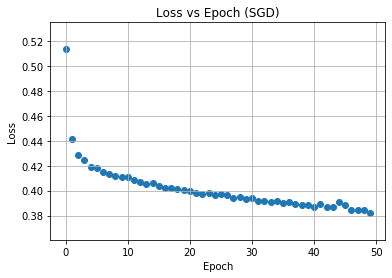

In [113]:
plot=np.arange(0,50,1)
lossplotSGD1=(historysgd.history['loss'])
plt.scatter(plot,lossplotSGD1)
plt.title('Loss vs Epoch (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
#plt.ylim((0.395,0.435))
plt.show()

In [115]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
# Wrap Keras model so it can be used by scikit-learn
neural_network2 = KerasClassifier(build_fn=create_network2, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
# Use cross_val_score function

scores = cross_val_score(neural_network2,X, Y, cv=10)

In [116]:
print(scores.max())
print(scores.min())
print(np.var(scores))

0.8640000224113464
0.5870000123977661
0.00542500017881423


In [117]:
accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy[1]*100))

7500/7500 [==============================] - 2s 256us/step
Accuracy: 81.32


In [118]:
print(model.summary())

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_519 (Dense)            (None, 60)                1140      
_________________________________________________________________
dense_520 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_521 (Dense)            (None, 50)                1550      
_________________________________________________________________
dense_522 (Dense)            (None, 70)                3570      
_________________________________________________________________
dense_523 (Dense)            (None, 40)                2840      
_________________________________________________________________
dense_524 (Dense)            (None, 2)                 82        
Total params: 11,012
Trainable params: 11,012
Non-trainable params: 0
_________________________________________________

In [119]:
accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

2500/2500 [==============================] - 0s 142us/step
Accuracy: 78.80


# MLP with Adam optimiser

In [120]:
def create_network3():
    model=Sequential()
    model.add(Dense(60, input_dim=18, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(70, activation='relu'))
    model.add(Dense(40, activation='relu'))
    #model.add(Dense(30, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #Y_train1= keras.utils.to_categorical(Y_train)
    return model
model = create_network3()
historyadam=model.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
7500/7500 [==============================] - 5s 607us/step - loss: 0.4605 - accuracy: 0.7697
Epoch 2/50
7500/7500 [==============================] - 4s 471us/step - loss: 0.4284 - accuracy: 0.7839
Epoch 3/50
7500/7500 [==============================] - 4s 477us/step - loss: 0.4224 - accuracy: 0.7851
Epoch 4/50
7500/7500 [==============================] - 4s 478us/step - loss: 0.4198 - accuracy: 0.7873
Epoch 5/50
7500/7500 [==============================] - 4s 479us/step - loss: 0.4150 - accuracy: 0.7905
Epoch 6/50
7500/7500 [==============================] - 4s 493us/step - loss: 0.4100 - accuracy: 0.7949
Epoch 7/50
7500/7500 [==============================] - 4s 506us/step - loss: 0.4072 - accuracy: 0.7948
Epoch 8/50
7500/7500 [==============================] - 4s 496us/step - loss: 0.4058 - accuracy: 0.7980
Epoch 9/50
7500/7500 [==============================] - 4s 500us/step - loss: 0.4007 - accuracy: 0.7953
Epoch 10/50
7500/7500 [==============================] - 4s 507u

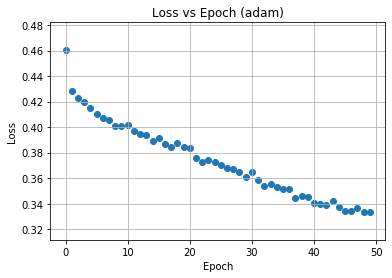

In [121]:
plot=np.arange(0,50,1)
lossplotadam1=(historyadam.history['loss'])
plt.scatter(plot,lossplotadam1)
plt.title('Loss vs Epoch (adam)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
#plt.ylim((0.395,0.435))
plt.show()

In [122]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
# Wrap Keras model so it can be used by scikit-learn
neural_network3 = KerasClassifier(build_fn=create_network3, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
# Use cross_val_score function

scores = cross_val_score(neural_network3,X, Y, cv=10)

In [123]:
print(scores.max())
print(scores.min())
print(np.var(scores))

0.8740000128746033
0.6010000109672546
0.006357690032062777


In [124]:
accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy[1]*100))

7500/7500 [==============================] - 2s 332us/step
Accuracy: 85.39


In [125]:
print(model.summary())

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_591 (Dense)            (None, 60)                1140      
_________________________________________________________________
dense_592 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_593 (Dense)            (None, 50)                1550      
_________________________________________________________________
dense_594 (Dense)            (None, 70)                3570      
_________________________________________________________________
dense_595 (Dense)            (None, 40)                2840      
_________________________________________________________________
dense_596 (Dense)            (None, 2)                 82        
Total params: 11,012
Trainable params: 11,012
Non-trainable params: 0
________________________________________________

In [126]:
accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

2500/2500 [==============================] - 0s 164us/step
Accuracy: 82.52


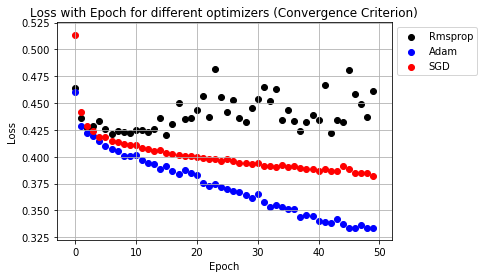

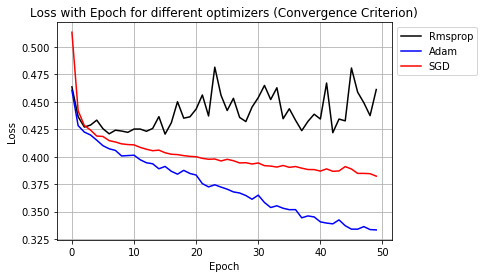

In [127]:
plot=np.arange(0,50,1)
plt.scatter(plot,lossplotrmsprop1, c='black', label='Rmsprop')
plt.scatter(plot,lossplotadam1, c='blue', label='Adam')
plt.scatter(plot,lossplotSGD1, c='red', label='SGD')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.title('Loss with Epoch for different optimizers (Convergence Criterion)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plot=np.arange(0,50,1)
plt.plot(plot,lossplotrmsprop1, c='black', label='Rmsprop')
plt.plot(plot,lossplotadam1, c='blue', label='Adam')
plt.plot(plot,lossplotSGD1, c='red', label='SGD')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.title('Loss with Epoch for different optimizers (Convergence Criterion)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# LightGBM

In [128]:

import lightgbm as lgb
from scipy import stats

from sklearn.metrics import accuracy_score

seed = 32
np.random.seed(seed)

lgbm_cl = lgb.LGBMClassifier(num_iterations=1500, num_leaves=2000, min_data_in_leaf=50, is_unbalance = False,application='binary', metric='binary_error')
print ("Fitting training set...")
lgbm_cl.fit(X_train, Y_train)
print ("Done")
print ("Predicting on validation set...")
print ("")
val_pred = lgbm_cl.predict(X_test)
print (val_pred.shape)
print ("")
print (stats.describe(val_pred))
print ("")
print (val_pred)
score = accuracy_score(Y_test, val_pred)
print ("Score: %f" %(score))


Fitting training set...


C:\Users\laksh\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Done
Predicting on validation set...

(2500,)

DescribeResult(nobs=2500, minmax=(0.0, 1.0), mean=0.4896, variance=0.24999183673469388, skewness=0.0416090018330201, kurtosis=-1.99826869096646)

[0. 0. 0. ... 1. 0. 1.]
Score: 0.945200


In [129]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

import lightgbm as lgb
from scipy import stats

from sklearn.metrics import accuracy_score

seed = 32
np.random.seed(seed)

lgbm_cl = lgb.LGBMClassifier(num_iterations=1500, num_leaves=2000, min_data_in_leaf=50, is_unbalance = False,application='binary', metric='binary_error')

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(lgbm_cl,X, Y, cv=10)

C:\Users\laksh\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\laksh\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\laksh\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\laksh\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\laksh\Anaconda3\lib\site-packages\lightgbm\engine.py:148: U

In [130]:
print(scores.max())
print(scores.min())
print(np.var(scores))

0.8058058058058059
0.68
0.0014337513442533039


In [131]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from mpl_toolkits.mplot3d import Axes3D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import InputLayer, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
# from brew.base import Ensemble
# from brew.base import EnsembleClassifier
# from brew.combination.combiner import Combiner
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier

# SVM classifier

In [132]:
svclassifier = SVC(kernel = 'rbf', gamma = 1, C = 10)
svclassifier.fit(X_train, Y_train)
y_train_pred = svclassifier.predict(X_train)
y_pred = svclassifier.predict(X_test)
print(accuracy_score(Y_test, y_pred) * 100)
print(accuracy_score(Y_train, y_train_pred) * 100)

83.36
99.61333333333333


In [133]:
from sklearn.model_selection import cross_val_score
#knn = KNeighborsClassifier(n_neighbors=5)
svclassifier = SVC(kernel = 'rbf', gamma = 1, C = 10)
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(svclassifier, X, Y, cv=10)
print(scores)
print(np.var(scores))

[0.77322677 0.70629371 0.7042957  0.777      0.77       0.689
 0.714      0.77977978 0.70570571 0.83483483]
0.0020520028716827813


In [134]:
clf2 = linear_model.LogisticRegression()
clf2.fit(X_train, Y_train)
y_train_pred = clf2.predict(X_train)
y_pred = clf2.predict(X_test)
print(accuracy_score(Y_test, y_pred) * 100)
print(accuracy_score(Y_train, y_train_pred) * 100)

74.68
76.26666666666667


C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
from sklearn.model_selection import cross_val_score
#knn = KNeighborsClassifier(n_neighbors=5)
clf2 = linear_model.LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(clf2, X, Y, cv=10)
print(scores.max())
print(scores.min())
print(np.var(scores))

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8338338338338338
0.655
0.0024375240257543335


C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
